# Explore here

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import xgboost as xgb
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from lazypredict.Supervised import LazyRegressor

df = pd.read_csv('/workspaces/machine-learning-python-template/data/raw/AB_NYC_2019.csv').iloc[:,1:]
df

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.68,-73.95,Private room,70,2,0,NaN,NaN,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70,-73.93,Private room,40,4,0,NaN,NaN,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81,-73.95,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.76,-73.99,Shared room,55,1,0,NaN,NaN,6,2


In [55]:
# Cuantas filas y columnas tiene el dataframe.

df.shape


(48895, 15)

In [56]:
# Se busca valores vacíos (NaN)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               

In [57]:
# Se aprecia cuantos valores diferentes tiene cada columna 

cont_unique = df.nunique()
cont_unique

name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [58]:
# Buscamos valores duplicados, si existen eliminar los duplicados.

df.duplicated().sum()

0

In [59]:
# Se puede apreciar los valores descriptivos

df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,38843.00,48895.00,48895.00
mean,67620010.65,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,78610967.03,0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,2438.00,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,7822033.00,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,30793816.00,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,107434423.00,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,274321313.00,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


In [60]:
# Consegumos las viviendas a precio cero y las ocultamos del estudio

viviendas_precio_cero = df[df['price'] == 0]
df = df[df['price'] != 0]
df.describe()



,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48884.00,48884.00,48884.00,48884.00,48884.00,48884.00,38833.00,48884.00,48884.00
mean,67622034.56,40.73,-73.95,152.76,7.03,23.27,1.37,7.14,112.78
std,78616662.30,0.05,0.05,240.17,20.51,44.55,1.68,32.96,131.63
min,2438.00,40.50,-74.24,10.00,1.00,0.00,0.01,1.00,0.00
25%,7817310.25,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,30792573.50,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,107434423.00,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,274321313.00,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


In [61]:
y = df.price.values
y

array([149, 225, 150, ..., 115,  55,  90])

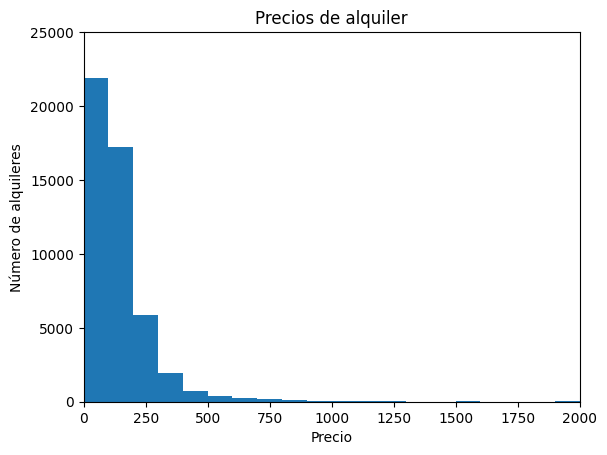

In [62]:
#Se crea un histograma con rangos en X e Y
plt.hist(y, bins=20, range=(0, 2000))
plt.xlim(0, 2000)
plt.ylim(0, 25000)
plt.title('Precios de alquiler')
plt.xlabel('Precio')
plt.ylabel('Número de alquileres')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1db18c4a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1da6e06d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1dad388d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1da6e2cf90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1da6e1f690>],
 'means': []}

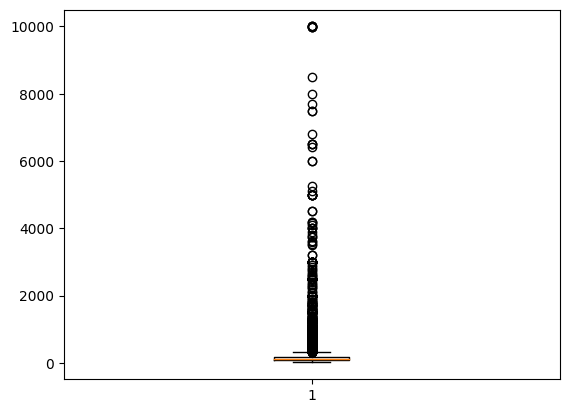

In [63]:
plt.boxplot(y)

[]

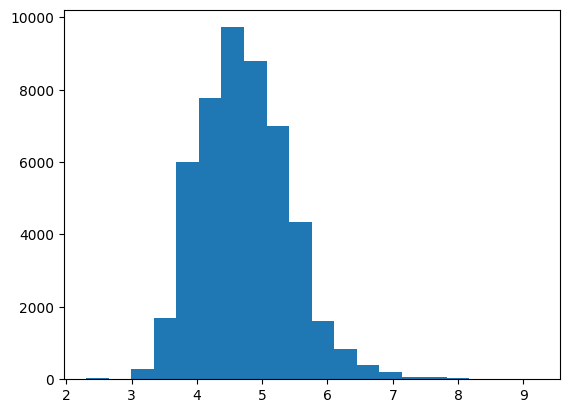

In [64]:
df['LOG_PRICE'] = np.log(df.price)
plt.hist(df['LOG_PRICE'], bins=20)
plt.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1da6f55410>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1da6fae150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1da6f36810>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1dad48a290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1dad488910>],
 'means': []}

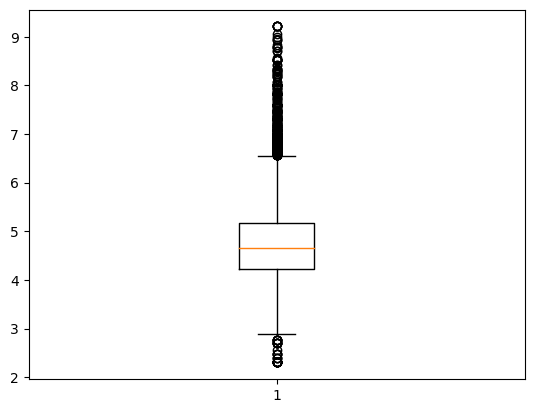

In [65]:
plt.boxplot(df.LOG_PRICE)

In [66]:
#Vemos el porcentaje en el cual impacta los valores NaN (no se borran filas con porcentajes altos)

df.isna().mean()*100


name                              0.03
host_id                           0.00
host_name                         0.04
neighbourhood_group               0.00
neighbourhood                     0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
last_review                      20.56
reviews_per_month                20.56
calculated_host_listings_count    0.00
availability_365                  0.00
LOG_PRICE                         0.00
dtype: float64

In [67]:
#Entendemos el porcentaje total de las filas

df.isnull().any(axis=1).sum()/len(df)*100

20.605924228786517

<Axes: >

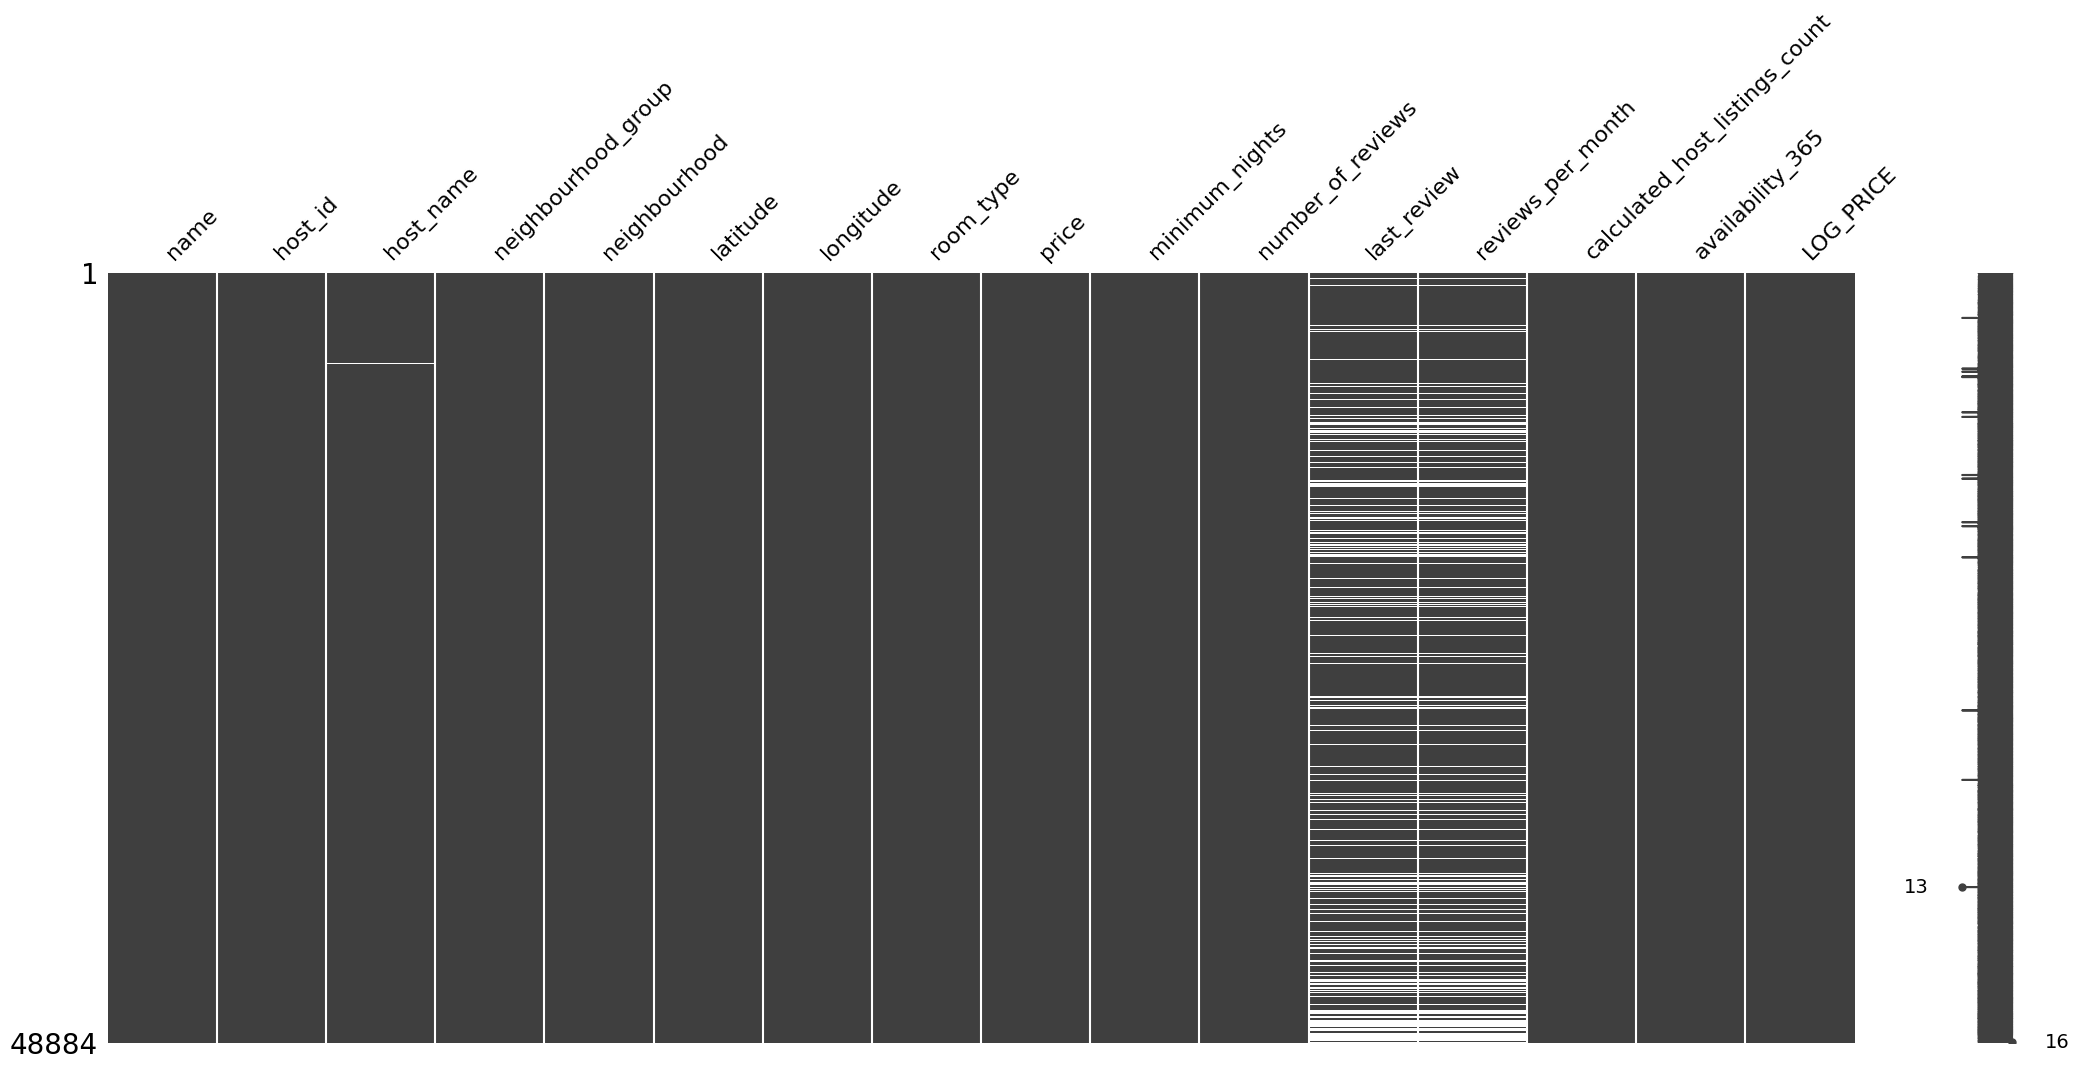

In [68]:
#Estudiamos si existe un patrón es los datos faltantes (si lo hay y es porque las viviendas son muy recientes)

msno.matrix(df)

In [69]:
# Obtener un resumen de cuántos valores faltantes hay en cada columna

valores_faltantes = df.isna()
print(valores_faltantes.sum())



name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10051
reviews_per_month                 10051
calculated_host_listings_count        0
availability_365                      0
LOG_PRICE                             0
dtype: int64


In [70]:
#Agregamos valores iguales a 0 a la columna reviews_per_month y se agrea la ultima fecha registrada
#Para no elimnar las filas con NaN de 'name' y 'host name' le hemos agregado un valor de 'desconocido'

df_con_valores_faltantes = df[df.isna().any(axis=1)]
df['reviews_per_month'].fillna(1, inplace=True)

df['last_review'] = pd.to_datetime(df['last_review'])

fecha_actual = pd.Timestamp.today()
fecha_mas_cercana = df['last_review'].iloc[(df['last_review'] - fecha_actual).abs().idxmin()]

df['last_review'].fillna(pd.Timestamp(fecha_mas_cercana), inplace=True)

df['name'].fillna('Desconocido', inplace=True)
df['host_name'].fillna('Desconocido', inplace=True)
df

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,LOG_PRICE
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365,5.00
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5.42
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,2019-07-08,1.00,1,365,5.01
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,4.49
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,4.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.68,-73.95,Private room,70,2,0,2019-07-08,1.00,2,9,4.25
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70,-73.93,Private room,40,4,0,2019-07-08,1.00,2,36,3.69
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81,-73.95,Entire home/apt,115,10,0,2019-07-08,1.00,1,27,4.74
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.76,-73.99,Shared room,55,1,0,2019-07-08,1.00,6,2,4.01


In [71]:
#Nos aseguramos que el dataframe no tiene valores vacios.

valores_faltantes = df.isna()
print(valores_faltantes.sum())

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
LOG_PRICE                         0
dtype: int64


In [72]:
# Vemos que columnas son no-numericas

df.select_dtypes(exclude='number').columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

In [73]:
# Excluimos columnas no-numericas para así crear un modelo limpio.

X = df.select_dtypes(include=['float64', 'int64'])
X = X.drop(['price', 'LOG_PRICE'], axis=1, errors='ignore')
y = df['LOG_PRICE']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [74]:
# Creamos una variables para conocer la distancia de cook

cook_distance = model.get_influence().cooks_distance[0]

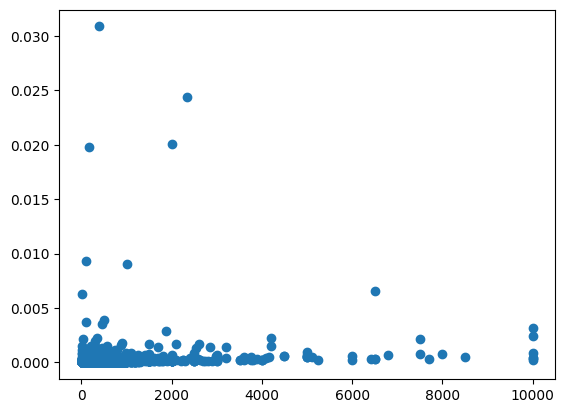

In [75]:
# Conocemos los valores que influyen (decidimos si la dejamos o la eliminamos)

plt.scatter(df.price, cook_distance)
plt.show()

In [76]:
np.where(cook_distance>0.005)

(array([ 2854,  5767, 13788, 17811, 21281, 42064, 44418, 48032]),)

In [77]:
df.iloc[[ 2854,  5767, 13788, 17811, 21281, 42064, 44418, 48032],:]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,LOG_PRICE
2854,Desconocido,6676776,Peter,Manhattan,Battery Park City,40.71,-74.02,Entire home/apt,400,1000,0,2019-07-08,1.00,1,362,5.99
5767,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73,-74.00,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365,5.19
13788,Private Room in Williamsburg!,53471415,Mark,Brooklyn,Williamsburg,40.71,-73.95,Private room,1002,365,10,2016-05-19,0.25,1,365,6.91
17811,Gorgeous 2 Bedroom apartment,41870118,Iveta,Queens,Forest Hills,40.72,-73.84,Entire home/apt,2350,365,0,2019-07-08,1.00,1,364,7.76
21281,Studio with amazing view,3737986,Carolann,Manhattan,Financial District,40.71,-74.02,Entire home/apt,12,300,0,2019-07-08,1.00,1,0,2.48
42075,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.76,-73.99,Private room,100,1,156,2019-07-07,58.50,9,299,4.61
44429,Room with sofa bed or air mattress,9295237,Noelle,Queens,Astoria,40.76,-73.91,Private room,2000,365,0,2019-07-08,1.00,2,0,7.60
48043,Luxury TriBeCa Apartment at an amazing price,271248669,Jenny,Manhattan,Tribeca,40.71,-74.01,Entire home/apt,6500,180,0,2019-07-08,1.00,1,365,8.78


In [78]:
# Se elimina las filas ya que el minimo de noches es muy diferente al resto.

df.drop([ 2854,  5767, 13788, 17811, 21281, 42064, 44418, 48032], axis=0, inplace=True)

In [79]:
# Excluimos columnas no-numericas

no_numericos = df.select_dtypes(exclude=['float64', 'int64']).columns
df_numericos = df.drop(columns=no_numericos)
df_numericos

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,LOG_PRICE
0,2787,40.65,-73.97,149,1,9,0.21,6,365,5.00
1,2845,40.75,-73.98,225,1,45,0.38,2,355,5.42
2,4632,40.81,-73.94,150,3,0,1.00,1,365,5.01
3,4869,40.69,-73.96,89,1,270,4.64,1,194,4.49
4,7192,40.80,-73.94,80,10,9,0.10,1,0,4.38
...,...,...,...,...,...,...,...,...,...,...
48890,8232441,40.68,-73.95,70,2,0,1.00,2,9,4.25
48891,6570630,40.70,-73.93,40,4,0,1.00,2,36,3.69
48892,23492952,40.81,-73.95,115,10,0,1.00,1,27,4.74
48893,30985759,40.76,-73.99,55,1,0,1.00,6,2,4.01


In [80]:
# Función para calcular IQR y aplicar winsorización
def winsorize_column(column, lower, upper):
    q1 = column.quantile(lower)
    q3 = column.quantile(upper)
    iqr_value = q3-q1
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    column = column.clip(lower=lower_bound, upper=upper_bound)
    return column

In [81]:
# Calcular el IQR y aplicar winsorización a cada columna
for column in df_numericos.columns:
    df_numericos[column] = winsorize_column(df_numericos[column], 0.25, 0.75)

In [82]:
df_numericos.apply(lambda x: x.skew())

host_id                          1.18
latitude                         0.24
longitude                        0.53
price                            1.02
minimum_nights                   1.29
number_of_reviews                1.23
reviews_per_month                1.05
calculated_host_listings_count   1.15
availability_365                 0.76
LOG_PRICE                        0.33
dtype: float64

In [83]:
df_new = pd.concat([df_numericos], axis=1)
df_new.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,LOG_PRICE
0,2787.00,40.65,-73.97,149,1,9.00,0.21,3.50,365,5.00
1,2845.00,40.75,-73.98,225,1,45.00,0.38,2.00,355,5.42
2,4632.00,40.81,-73.94,150,3,0.00,1.00,1.00,365,5.01
3,4869.00,40.69,-73.96,89,1,58.50,3.53,1.00,194,4.49
4,7192.00,40.80,-73.94,80,10,9.00,0.10,1.00,0,4.38


In [84]:
from sklearn.ensemble import IsolationForest
# Crea un modelo de Isolation Forest y ajustalo a los datos
model = IsolationForest().fit(df_new)

# Predice si cada observación es un valor atípico (anomalía) o no
predictions = model.predict(df_new)

# 'predictions' contendrá 1 para observaciones normales y -1 para valores atípicos
print(f'Observaciones predichas como atípicas: {np.where(predictions==-1)[0]}')

Observaciones predichas como atípicas: [    0     1     6 ... 48867 48868 48874]


In [85]:
# Vemos el tamanyo de las observaciones atipicas (es muy grande, debe corregirse)
len(np.where(predictions==-1)[0])

21437

In [86]:
zonas = df['neighbourhood_group'].value_counts()
zonas

neighbourhood_group
Manhattan        21655
Brooklyn         20093
Queens            5665
Bronx             1090
Staten Island      373
Name: count, dtype: int64

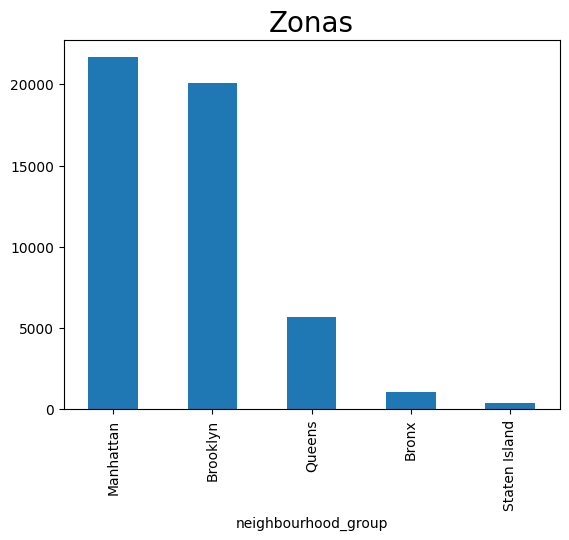

In [87]:
zonas.plot(kind="bar")
plt.title("Zonas", size=20, color="black")
plt.show()

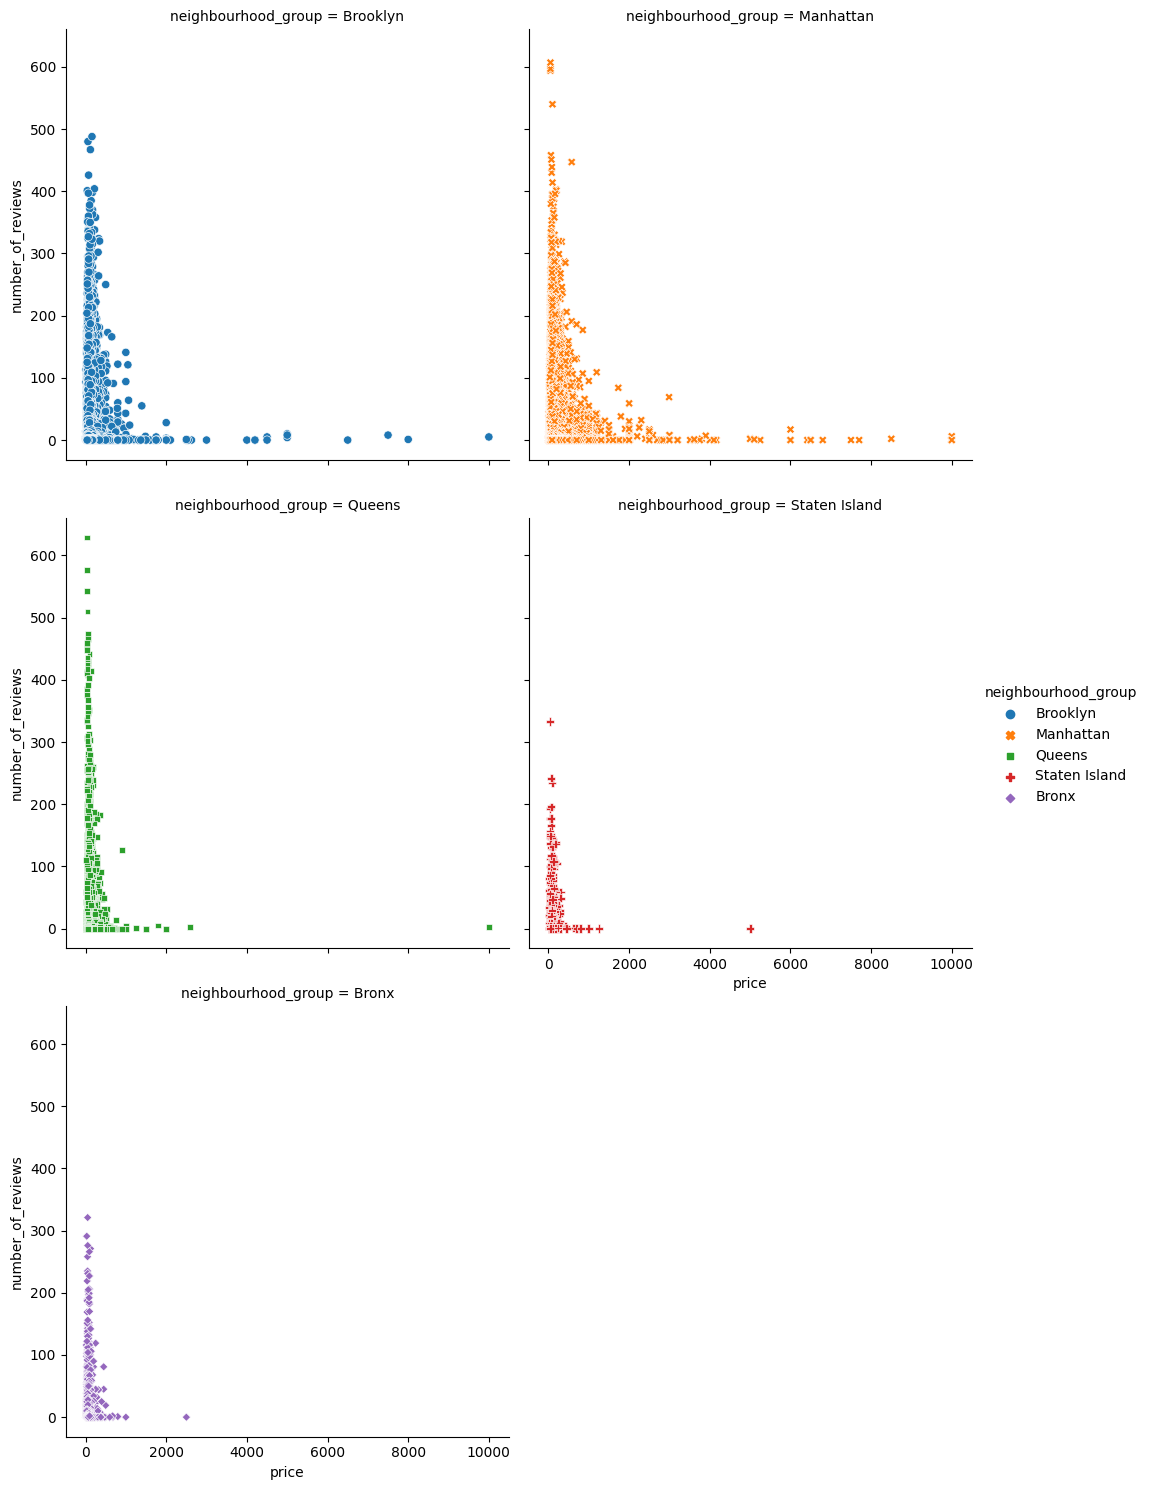

In [88]:
# Comparamos el precio con la cantidad de visitas 

relacion_precio_visulizaciones = sns.relplot(data=df, x='price', y='number_of_reviews', hue='neighbourhood_group', style='neighbourhood_group', col='neighbourhood_group', col_wrap=2)

In [89]:
df_corr = df_new.corr()
df_corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,LOG_PRICE
host_id,1.000,0.020,0.116,0.012,-0.064,-0.127,0.258,0.183,0.203,-0.019
latitude,0.020,1.000,0.110,0.075,0.031,-0.026,-0.014,-0.001,-0.011,0.083
longitude,0.116,0.110,1.000,-0.365,-0.121,0.081,0.118,0.079,0.073,-0.388
price,0.012,0.075,-0.365,1.000,0.053,-0.066,-0.024,-0.056,0.113,0.963
minimum_nights,-0.064,0.031,-0.121,0.053,1.000,-0.210,-0.266,0.182,0.157,0.042
number_of_reviews,-0.127,-0.026,0.081,-0.066,-0.210,1.000,0.616,0.052,0.191,-0.047
reviews_per_month,0.258,-0.014,0.118,-0.024,-0.266,0.616,1.000,0.101,0.199,-0.024
calculated_host_listings_count,0.183,-0.001,0.079,-0.056,0.182,0.052,0.101,1.000,0.414,-0.091
availability_365,0.203,-0.011,0.073,0.113,0.157,0.191,0.199,0.414,1.000,0.097
LOG_PRICE,-0.019,0.083,-0.388,0.963,0.042,-0.047,-0.024,-0.091,0.097,1.000


In [90]:
# Para saber la correlacion de un dato menor al 10%

df_corr[df_corr.reviews_per_month.abs()<0.1].index

Index(['latitude', 'price', 'LOG_PRICE'], dtype='object')

In [91]:
# Para saber la correlacion de un dato mayor al 40%

df_corr[df_corr.reviews_per_month.abs()>0.4].index

Index(['number_of_reviews', 'reviews_per_month'], dtype='object')

In [92]:
# Calcular los VIF
vif = pd.Series([variance_inflation_factor(df_corr.values, i) for i in range(df_corr.shape[1])], index=df_new.columns)

vif

host_id                            3.38
latitude                           1.23
longitude                          2.82
price                            794.01
minimum_nights                     1.95
number_of_reviews                  9.16
reviews_per_month                  9.86
calculated_host_listings_count     2.90
availability_365                   3.16
LOG_PRICE                        822.30
dtype: float64

NO SE BORRA NINGUNA FILA PORQUE NINGUNA ES PERFECTA (INF) SI NO SE ESCRIBIRIA ASI: 

df_new.drop(['LINEA CON INF', 'LINEA CON INF'], axis=1, inplace=True)

In [93]:
# Separamos la variables objetivos, de las variables que condicionan el precio. 
# La X es lo que el usuario final le va a meter al modelo.

X = df_new.drop(['LOG_PRICE', 'price'], axis=1)
y = df_new['LOG_PRICE']

In [94]:
# Entrenamos al algoritmo para que tome un 80% de los datos y es importante barajear los datos.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Crea un modelo XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror')

In [96]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [97]:
# Pedimos que nos de los valores mas importantes del dataset

model.feature_importances_

array([0.06056536, 0.14299868, 0.31038475, 0.1053627 , 0.06493099,
       0.05013084, 0.16134927, 0.10427742], dtype=float32)

In [98]:
# Pedimos el nombre de las columnas

feature_names = X.columns
feature_names

Index(['host_id', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [99]:
# Se hune los dos datos anteriores y creamos un diccionario.


d_imp = dict(zip(feature_names,  model.feature_importances_))
d_imp

{'host_id': 0.06056536,
 'latitude': 0.14299868,
 'longitude': 0.31038475,
 'minimum_nights': 0.1053627,
 'number_of_reviews': 0.06493099,
 'reviews_per_month': 0.050130837,
 'calculated_host_listings_count': 0.16134927,
 'availability_365': 0.10427742}

In [100]:
# Ordenamos los datos de forma ascendente.

for k, v in dict(sorted(d_imp.items(), key=lambda x:x[1], reverse = True)).items():
  print(k, v)

longitude 0.31038475
calculated_host_listings_count 0.16134927
latitude 0.14299868
minimum_nights 0.1053627
availability_365 0.10427742
number_of_reviews 0.06493099
host_id 0.06056536
reviews_per_month 0.050130837


In [102]:
X_train.drop(vars_to_delete, axis=1, inplace=True)
X_test.drop(vars_to_delete, axis=1, inplace=True)

In [103]:
# No se utiliza ninguna variable binaria porque el dataset no tiene valores binarios. sino se utilizaria asi:
#binary_cols = X_train[(X_train==0)|(X_train==1)].dropna(axis=1).columns
#X_train_num = X_train.drop(binary_cols, axis=1)
#X_test_num = X_test.drop(binary_cols, axis=1)

In [104]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

MinMaxScaler()

In [106]:
X_train_num_sc = scaler.transform(X_train_num)

X_test_num_sc = scaler.transform(X_test_num)

np.max(X_test_num_sc, axis=1)

array([0.86799914, 0.52650705, 0.56193886, ..., 0.98630137, 1.        ,
       1.        ])

In [107]:
X_train_num_sc

array([[4.29669135e-01, 7.95557229e-01, 5.93576315e-01, ...,
        7.38636364e-02, 0.00000000e+00, 4.38356164e-02],
       [2.33177795e-02, 3.65998083e-01, 4.92144079e-01, ...,
        1.05113636e-01, 0.00000000e+00, 3.83561644e-02],
       [3.24041786e-03, 3.01752464e-01, 3.55867892e-01, ...,
        2.81250000e-01, 4.00000000e-01, 0.00000000e+00],
       ...,
       [4.62015242e-02, 3.16470427e-01, 5.08764429e-01, ...,
        4.26136364e-02, 0.00000000e+00, 0.00000000e+00],
       [7.12325468e-04, 6.65902245e-01, 3.91941000e-01, ...,
        3.40909091e-02, 0.00000000e+00, 5.47945205e-03],
       [1.77503976e-01, 6.15963855e-01, 4.65102608e-01, ...,
        3.97727273e-02, 1.00000000e+00, 7.94520548e-01]])

In [110]:
X_train_sc = pd.concat([pd.DataFrame(data=X_train_num_sc, columns=X_train_num.columns), X_train[binary_cols].reset_index(drop=True)], axis=1)

In [111]:
X_test_sc = pd.concat([pd.DataFrame(data=X_test_num_sc, columns=X_test_num.columns), X_test[binary_cols].reset_index(drop=True)], axis=1)

In [112]:
model = TSNE(n_components=2, random_state=0)

In [113]:
X_tsne = model.fit_transform(X_train_sc)

In [114]:
X_tsne

array([[-27.504593,  32.05264 ],
       [-55.00792 ,  61.915432],
       [  9.601534,  41.643   ],
       ...,
       [-76.20074 ,  63.781612],
       [-89.21587 , -23.356339],
       [ 30.145   ,  85.8815  ]], dtype=float32)

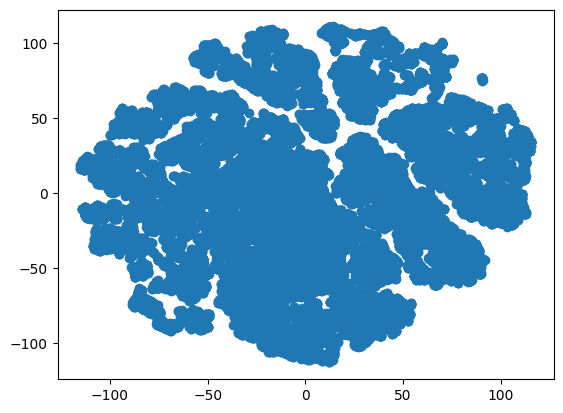

In [115]:
plt.scatter(X_tsne[:,0], X_tsne[:,1])

In [116]:
pca = PCA(.99)

X_pca_train = pca.fit_transform(X_train_sc)

In [117]:
X_pca_train.shape

(39100, 8)

In [118]:
pca.explained_variance_ratio_

array([0.29395992, 0.24111134, 0.13953218, 0.10592435, 0.09000778,
       0.05177152, 0.04084998, 0.03684293])

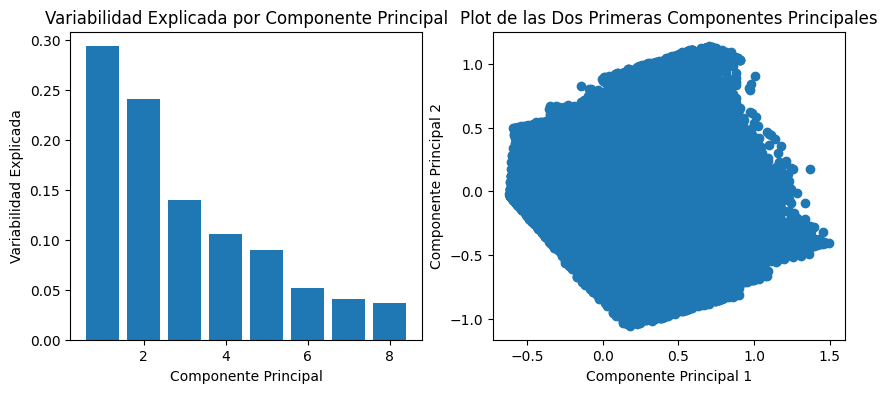

In [119]:
# Obtén las dos primeras componentes principales
componente_1 = X_pca_train[:, 0]
componente_2 = X_pca_train[:, 1]

# Calcula la variabilidad explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_

# Crea un bar plot de la variabilidad explicada
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada)
plt.xlabel('Componente Principal')
plt.ylabel('Variabilidad Explicada')
plt.title('Variabilidad Explicada por Componente Principal')

# Crea un scatter plot de las dos primeras componentes principales
plt.subplot(1, 2, 2)
plt.scatter(componente_1, componente_2)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Plot de las Dos Primeras Componentes Principales')
plt.show()

In [120]:
X_pca_test = pca.transform(X_test_sc)

In [121]:
reg = LazyRegressor()
models, predictions = reg.fit(X_pca_train, X_pca_test, y_train, y_test)

 98%|█████████▊| 41/42 [04:04<00:10, 10.02s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002957 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 39100, number of used features: 8
[LightGBM] [Info] Start training from score 4.719800


100%|██████████| 42/42 [04:05<00:00,  5.84s/it]


In [122]:
print(models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                        0.38       0.38  0.53       42.54
ExtraTreesRegressor                          0.38       0.38  0.53        9.23
LGBMRegressor                                0.37       0.37  0.54        0.35
HistGradientBoostingRegressor                0.37       0.37  0.54        0.51
NuSVR                                        0.36       0.36  0.54       85.44
XGBRegressor                                 0.36       0.36  0.54        5.67
MLPRegressor                                 0.35       0.35  0.54       12.17
SVR                                          0.35       0.35  0.54       67.65
GradientBoostingRegressor                    0.33       0.33  0.55       13.02
BaggingRegressor                             0.32       0.32  0.56        3.82
KNeighborsRegressor                          0.28   